<a href="https://colab.research.google.com/github/sanjanabontha/SKMLI-175-TASKS/blob/main/Phase1(1A_ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.4837600396939653
Epoch 1000, Loss: 0.020915347946071132
Epoch 2000, Loss: 0.014292432182310572
Epoch 3000, Loss: 0.01290285244602389
Epoch 4000, Loss: 0.012351916005593438
Epoch 5000, Loss: 0.012069471421099735
Epoch 6000, Loss: 0.011903231275200524
Epoch 7000, Loss: 0.011796306249416301
Epoch 8000, Loss: 0.011722418260162064
Epoch 9000, Loss: 0.01166738624307243
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.29      1.00      0.45        13
   virginica       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



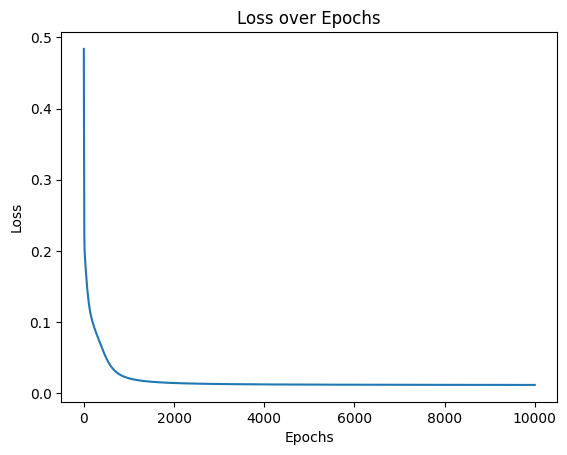

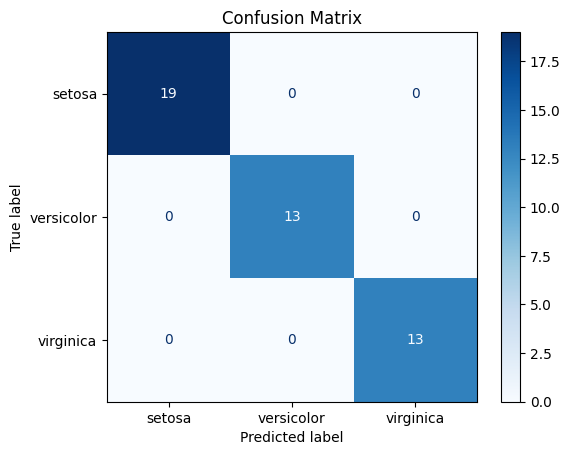

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)
        self.bias_hidden = np.random.rand(self.hidden_size)
        self.bias_output = np.random.rand(self.output_size)
        self.losses = []

    def forward(self, X):
        # Forward pass
        self.hidden_layer_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_activation)
        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_activation)
        return self.output

    def backward(self, X, y, learning_rate):
        # Backward pass
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - self.output))
            self.losses.append(loss)
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

# Load dataset and preprocess
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding of the target variable
y = np.eye(3)[y]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 5  # Number of neurons in the hidden layer
output_size = y_train.shape[1]

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs=10000, learning_rate=0.01)

# Test the neural network
y_pred = nn.forward(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

# Plot loss over epochs
plt.plot(nn.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
